# The Spark Foundation

## GRIP: Data Science and Business Analytics

### Author: Avanti Maske

# Task 1: Prediction using supervised Machine Learning

### Simple linear regression
###### In this regression task we will predict the score that a student can receive based upon the amount of time they spent studying. This regression task requires only two variables so it can be considered to be fairly easy.

### Importing all the required libraries

In [2]:
import numpy as np #For mathematical operation 
import pandas as pd #For data manipulation 
import seaborn as sns #seaborn and matplotlib for data visualization 
import matplotlib.pyplot as plt 

### Importing dataset 

In [3]:
dataset = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

### Reading dataset

In [4]:
ds = pd.read_csv(dataset)

### Getting the size of the dataset

In [5]:
ds.shape #gives number of rows and column in dataset

(25, 2)

In [6]:
ds.describe() #returns description of dataset 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
ds #displays the dataset 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
ds.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Getting the information about dataset

In [10]:
ds.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
ds.isnull().sum() #to check if there are any empty cells in the dataset 

Hours     0
Scores    0
dtype: int64

## Visualizing the data 

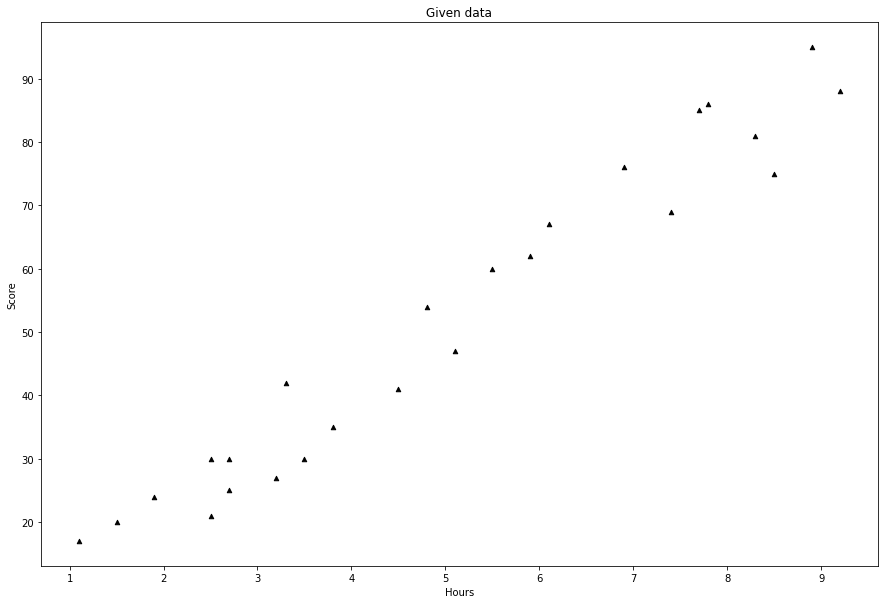

In [12]:
plt.rcParams["figure.figsize"] = [15,10]

ds.plot(kind = "scatter", x = "Hours", y = "Scores", color = "black", marker = "^")
plt.title("Given data")
plt.xlabel("Hours")
plt.ylabel("Score")

plt.show()


#### Scatter plot for the given dataset with x parameter as "study hours" and y parameters as "Score"

In [13]:
ds.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### By observing th e visualization we can conclude that the realtionship between the parameter "Study hours" and "Score" is LINEAR. Therefore, we will be using Linear Regression to predict the Scores of student based on the no. of hours they study.

In [14]:
x = ds.iloc[:,:-1].values   #to divide the dataset in two parts 
y = ds.iloc[:,1:].values

In [15]:
x #hours 

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [60]:
y  #score 

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3) #test size determines what % of data will go into testing, the rest goes into training

In [63]:
x_train #70% data for training 

array([[3.8],
       [5.5],
       [4.5],
       [2.7],
       [6.1],
       [1.9],
       [8.3],
       [4.8],
       [7.4],
       [1.5],
       [8.9],
       [2.7],
       [3.2],
       [7.8],
       [5.1],
       [3.3],
       [2.5]])

In [64]:
y_train

array([[35],
       [60],
       [41],
       [25],
       [67],
       [24],
       [81],
       [54],
       [69],
       [20],
       [95],
       [30],
       [27],
       [86],
       [47],
       [42],
       [21]], dtype=int64)

In [65]:
x_test #30% data is for testing 

array([[7.7],
       [6.9],
       [8.5],
       [2.5],
       [9.2],
       [3.5],
       [1.1],
       [5.9]])

In [66]:
y_test

array([[85],
       [76],
       [75],
       [30],
       [88],
       [30],
       [17],
       [62]], dtype=int64)

## Training the algorithm 

#### We will be training the algorithm using the training and testing sets.

In [67]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(x_train, y_train) 

LinearRegression()

In [68]:
line = regression.coef_*x+regression.intercept_ 

In [69]:
line 

array([[26.00872299],
       [52.48377483],
       [33.13662156],
       [87.10499645],
       [36.19143524],
       [15.82601075],
       [94.23289502],
       [56.55685972],
       [85.068454  ],
       [28.04526544],
       [78.95882666],
       [60.62994462],
       [46.37414748],
       [34.15489279],
       [11.75292585],
       [91.17808135],
       [26.00872299],
       [19.89909565],
       [62.66648707],
       [75.90401299],
       [28.04526544],
       [49.42896115],
       [39.24624891],
       [70.81265686],
       [79.97709788]])

## Visualizing the relationship

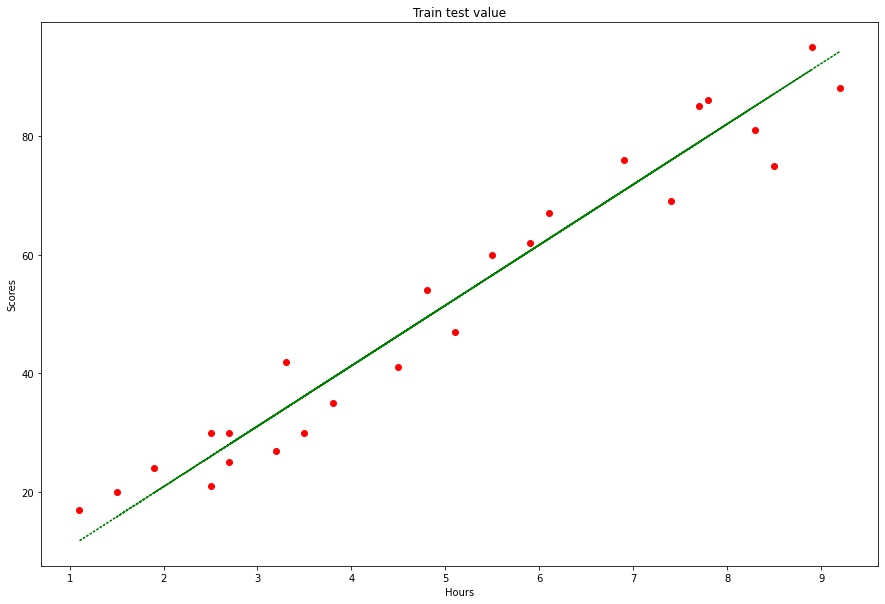

In [70]:
plt.scatter(x, y, color ="red")
plt.plot(x, line, color ="green", linestyle = "dotted")
plt.title("Train test value")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Using trained algorithm to make predictions 

In [76]:
y_pred = regression.predict(x_test)

In [72]:
y_pred #predicted values for score

array([[78.95882666],
       [70.81265686],
       [87.10499645],
       [26.00872299],
       [94.23289502],
       [36.19143524],
       [11.75292585],
       [60.62994462]])

## Comparing with actual values  

In [94]:
print(" Actual : \n {} \n\nPredicted : \n {}".format(y_test,y_pred))

 Actual : 
 [[85]
 [76]
 [75]
 [30]
 [88]
 [30]
 [17]
 [62]] 

Predicted : 
 [[78.95882666]
 [70.81265686]
 [87.10499645]
 [26.00872299]
 [94.23289502]
 [36.19143524]
 [11.75292585]
 [60.62994462]]


### Aswering the problem statement using trained algorithm to make predictions

In [87]:
hours = 9.25
our_pred = regression.predict([[hours]])
print(f"No. of hours = {hours}")
print(f"Predicted score = {our_pred}")

No. of hours = 9.25
Predicted score = [[94.74203064]]


# Evaluating the  model 

In [93]:
from sklearn import metrics #Tells the error rate 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.795781215899176


In [92]:
from sklearn.metrics import r2_score # R2score is a statistical measure of how well the algorithms work
print('R2 Score :', r2_score(y_test, y_pred) )

R2 Score : 0.939628695953536
